# Linear Regression
- Modelo Supervizado de REGRESIÓN.
- Ventajas:
    - Ampliamente utilizado
    - Corre rápido
    - Fácil de usar
    - Altamente interpretable
    - Base para muchos otros métodos

##### Regresion
- Modelar datos de entrada, de forma tal de poder predecir la salida.

##### Regresion lineal
- Valor (salida) específico para ciertos valores de entrada.
- Intervalo de valores, donde la probabilidad es mayor a P, para ciertos valores de entrada.
- Con pocas observaciones (~30) es un buen modelo.

## 1. Simple Linear Regression

La regresión lineal simple es un enfoque para predecir una respuesta cuantitativa utilizando una única característica (variable de entrada)

$y = \beta_0 + \beta_1x$

In [1]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
np.set_printoptions(threshold=np.inf) #Print complete matrix/array
%matplotlib inline

In [2]:
def LinearRegressionSklearn(feature_matrix, results, feature_matrix_test):
    lm = LinearRegression()
    
    #Entrenamos el modelo
    lm.fit(features_matrix, results)
    
    #Puntaje del modelo
    score = lm.score(features_matrix, results)
    
    #Predice el resultado
    predict = lm.predict(feature_matrix_test)
    
    return score, predict, lm.intercept_, lm.coef_


In [3]:
def plot(x, y, color='black', label='datos', xlabel='', ylabel=''):
    plt.scatter(x, y,  color=color, label=label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt


In [4]:
def plotRect(plt, x, y, label='', color='blue', linewidth=3):
    plt.plot(x, y, color=color, linewidth=linewidth, label=label)
    return plt


In [5]:
def getPointRect(data):
    min = int(np.amin(data))
    max = int(np.amax(data)) + 2
    step = max - min - 1
    return min, max, step


### Examples

#### Advertising

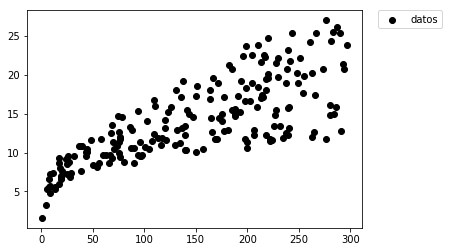

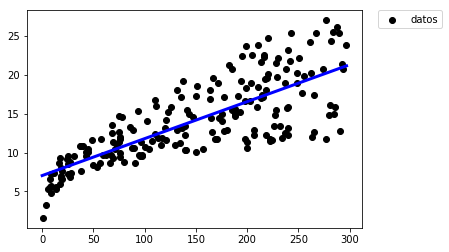

Si se invierten 150 en TV, se estima una ganancia de 14.16 , con un 61.19% de confianza.


In [8]:
df = pd.read_csv('../datasets/Advertising.csv', index_col=0)

# Eliminamos los nan
df = df[~np.isnan(df).any(axis=1)]

features_matrix = df.values[:, 0, np.newaxis]
index_last_column = df.shape[1] - 1
results = df.values[:, index_last_column]

N = 150
score, predict, intercept, coef = LinearRegressionSklearn(features_matrix, results, np.matrix([N]))

min, max, step = getPointRect(df.values[:,0])
x = np.arange(min, max, step)
y = intercept + coef * x

plt = plot(features_matrix, results)
plt.show()
plt = plot(features_matrix, results)
plt = plotRect(plt, x, y)
plt.show()

print(f"Si se invierten {N} en TV, se estima una ganancia de {np.round(float(predict), 2)} , con un {np.round(score * 100, 2)}% de confianza.")

#### LSD

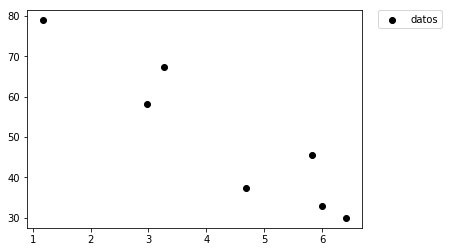

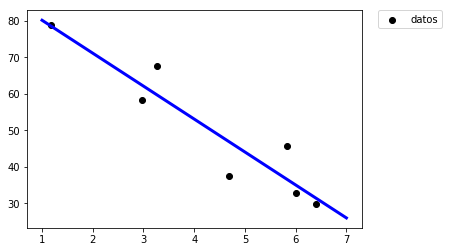

Si se le da a los chicos 4 gr de LSD, se estima que se sacará 53.09 en el examen, con un 87.78% de confianza.


In [11]:
df = pd.read_csv("../datasets/lsd.dat", sep="   ", header=None, engine="python")

features_matrix = df.values[:, 0, np.newaxis]
index_last_column = df.shape[1] - 1
results = df.values[:, 1]

N = 4
score, predict, intercept, coef = LinearRegressionSklearn(features_matrix, results, np.matrix([N]))

min, max, step = getPointRect(df.values[:,0])
x = np.arange(min, max, step)
y = intercept + coef * x

plt = plot(features_matrix, results)
plt.show()
plt = plot(features_matrix, results)
plt = plotRect(plt, x, y)
plt.show()

print(f"Si se le da a los chicos {N} gr de LSD, se estima que se sacará {np.round(float(predict), 2)} en el examen, con un {np.round(score * 100, 2)}% de confianza.")

## 2. Multiple Linear Regression

La regresión lineal simple se puede extender fácilmente para incluir múltiples características. Esto se llama **regresión lineal múltiple**:
$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Cada $x$ representa una característica diferente, y cada característica tiene su propio coeficiente.

### Formas de medir que tan bueno es un parametro
###### pvalue
- Si el pvalue es mayor a 0.05, esa variable no se deberia de usar. Quiere decir que no aporta valor, no influye, en la salida

##### BIC
- Cuanto mas bajo es el BIC, es mejor esa combinación de parámetros

##### AIC
- Cuanto mas bajo es el AIC, es mejor esa combinación de parámetros

Entre AIC y BIC, el mas fiable es el BIC (mirar primero el BIC).

##### R-squared:

- Que tan bien ajusta el modelo a las observaciones. El valor es en base a los datos de entrenamiento (No representa el score del modelo, ya que puede haber overfitting).

In [12]:
df = pd.read_csv('../datasets/Advertising.csv', index_col=0)

lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
print(lm.pvalues)
print("AIC =>", lm.aic)
print("BIC =>", lm.bic)

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64
AIC => 780.3622358887662
BIC => 793.5555053549584


In [13]:
print("Quitamos newspaper y vemos que baja el AIC Y BIC, por lo que deberiamos usar TV y radio.")
lm = smf.ols(formula='sales ~ TV + radio', data=df).fit()
print(lm.pvalues)
print("AIC =>", lm.aic)
print("BIC =>", lm.bic)

Quitamos newspaper y vemos que baja el AIC Y BIC, por lo que deberiamos usar TV y radio.
Intercept    4.565557e-19
TV           5.436980e-82
radio        9.776972e-59
dtype: float64
AIC => 778.3940987026803
BIC => 788.2890508023244


In [14]:
# Eliminamos los nan
df = df[~np.isnan(df).any(axis=1)]

features_matrix = df.values[:, :-2]
index_last_column = df.shape[1] - 1
results = df.values[:, index_last_column]

matrix = [214, 24]
score, predict, intercept, coef = LinearRegressionSklearn(features_matrix, results, np.matrix(matrix))

print(f"Si se invierten {matrix[0]} en TV y {matrix[1]} en radio, se estima una ganancia de {np.round(float(predict), 2)}, con un {np.round(score * 100, 2)}% de confianza.")

Si se invierten 214 en TV y 24 en radio, se estima una ganancia de 17.22, con un 89.72% de confianza.


## Estrategias


#### 1- Aplicar f(y) sobre los datos
- Si a medida que aumenta el X, la varianza aumenta (La diferencia entre los datos y la recta), se podria utilizar una función $f(y) = \beta_0 + \beta_1x$ 
- La mas común es utilizar el log(), podria ser $log(y) = \beta_0 + \beta_1x$ para que la aproximación sea mas precisa. Luego al resultado hay que aplicarle la función inversa para obtener la estimación real en base a la unidad de los datos de entrada. En el caso del logaritmo, seria elevar *e* al valor dado.

#### Example Log()

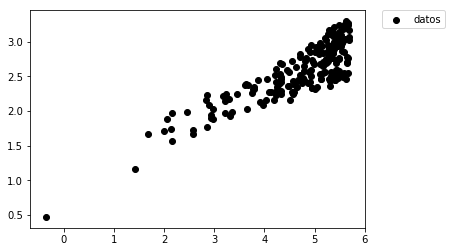

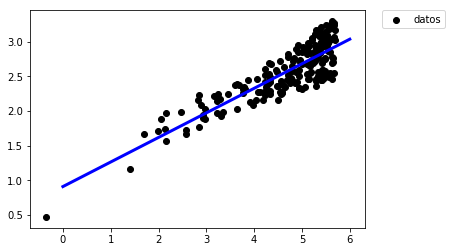

Si se invierten 150 en TV, se estima una ganancia de 14.67, con un 74.34% de confianza.


In [15]:
df = pd.read_csv('../datasets/Advertising.csv', index_col=0)

# Eliminamos los 0 y los nan para evitar infinitos en el Log()
df = df[(df != 0.0)]
df = df[~np.isnan(df).any(axis=1)]
df = np.log(df)

features_matrix = df.values[:, 0, np.newaxis]
index_last_column = df.shape[1] - 1
results = df.values[:, index_last_column]

N = 150
score, predict, intercept, coef = LinearRegressionSklearn(features_matrix, results, np.matrix([np.log(N)]))

min, max, step = getPointRect(df.values[:,0])
x = np.arange(min, max, step)
y = intercept + coef * x

plt = plot(features_matrix, results)
plt.show()
plt = plot(features_matrix, results)
plt = plotRect(plt, x, y)
plt.show()

print(f"Si se invierten {N} en TV, se estima una ganancia de {np.round(math.exp(float(predict)), 2)}, con un {np.round(score * 100, 2)}% de confianza.")

#### 2- Regresión polinomial

Algunas veces cuando la relación entre las variables dependientes e independientes es no lineal, es útil incluir términos polinomiales para ayudar a explicar la variación de nuestra variable dependiente. Nótese que si bien la relación entre las variables dependientes e independientes es no lineal, la relación entre el estimador de la variable dependiente y los parámetros sigue siendo lineal, por lo que se puede aplicar el mismo método sin problema.

Las regresiones polinomiales se pueden ajustar la variable independiente con varios términos:

$$ y = a + b \; x + c \; x^2  \longleftarrow \text{Segundo Grado}$$
$$ y = a + b \; x + c \; x^2 + d \; x^3 \longleftarrow \text{Tercer Grado}$$
$$ y = a_0 + a_1 \; x + a_2 \; x^2 +. . .  a_n \; x^n \longleftarrow \text{Ecuación general para cualquier grado}$$

Las variables de orden superior se toman como nuevas variables independientes y por cada variable independiente del sistema aparece un parámetro nuevo en nuestro modelo.

#### Example elevar al cuadrado
$y = a + b \; x + c \; x^2$

In [16]:
df = pd.read_csv("../datasets/lsd.dat", sep="   ", header=None, engine="python")

new_data = pd.DataFrame(np.zeros(shape=(df.shape[0], 3)))
# Elevamos la variable al cuadrado
for i in range(df.shape[0]):
    new_data[0][i] = df[0][i]
    new_data[1][i] = pow(df[0][i], 2)
    new_data[2][i] = df[1][i]
    
features_matrix = new_data.values[:, :-1]
index_last_column = new_data.shape[1] - 1
results = new_data.values[:, index_last_column]

N = 4
matrix = [N, pow(N, 2)]
score, predict, intercept, coef = LinearRegressionSklearn(features_matrix, results, np.matrix(matrix))


print(f"Si se le da a los chicos {N} gr de LSD, se estima que se sacará {np.round(float(predict), 2)} en el examen, con un {np.round(score * 100, 2)}% de confianza.")

Si se le da a los chicos 4 gr de LSD, se estima que se sacará 52.28 en el examen, con un 87.92% de confianza.
